## Homework 1 - Containers and Virtual Machines

Sebastian Endara 323096
, Juan Venegas 

In this assignment we will be comparing the usage and performance of both virtual machines and containers. For this activity, you’ll be working on groups of 2 people (max 3).
Requirements:

    The server: 1 computer running Vagrant and Docker

    The client: 1 computer with at least Vagrant

Experiment 1:

For the server, write a Vagrant file that starts a Ubuntu VM, installs and configures a web server such as NGINX, and starts up the web server. The web server should host a very simple web page.

In the client, you’ll write a Vagrant file that starts Ubuntu and installs wrk. Then you’ll login into the VM, and use wrk to run a load test against the web server running in the server machine.

You can find wrk at: https://github.com/wg/wrk

Note that for this experiment to work, you will need to make sure that you configure the network of the VM in the right way. You can find tutorials online on how to do this.

Make sure that your load test runs for at least 3 minutes. Your load test should generate at least 100 requests per second. When your load test is running, you should take screenshots that show the CPU and memory utilization of the server machine.

### Vagrant Servidor

Para la primera parte del experimento, primero se inicializo la maquina virtual que correra al servidor, para esto se configuro el vagrant file proveniente de inicializar el vagrant con el comando:

In [ ]:
vagrant init hashicorp/bionic64

La configuracion de este archivo se destaca en las siguientes lineas, que explican para que sirve cada modificacion:

Esta configuración permite que cualquier tráfico que llegue al puerto 8080 de la máquina anfitriona se reenvíe al puerto 80 de la máquina virtual. Esto es útil, por ejemplo, si estás ejecutando un servidor web en la máquina virtual que escucha en el puerto 80 y quieres poder acceder a él desde la máquina anfitriona:

In [ ]:
# Create a forwarded port mapping which allows access to a specific port
  # within the machine from a port on the host machine. In the example below,
  # accessing "localhost:8080" will access port 80 on the guest machine.
  # NOTE: This will enable public access to the opened port
   config.vm.network "forwarded_port", guest: 80, host: 8080


Esta configuración establece una red privada entre la máquina anfitriona y la máquina virtual, y asigna a la máquina virtual una dirección IP específica en esa red.

In [ ]:
 # Create a private network, which allows host-only access to the machine
  # using a specific IP.
   config.vm.network "private_network", ip: "192.168.33.10"

Esta sección del Vagrantfile te permite personalizar la configuración de la máquina virtual en formas que son específicas del VirtualBox

In [ ]:
#
   config.vm.provider "virtualbox" do |vb|
  #   # Display the VirtualBox GUI when booting the machine
     vb.gui = true
  #
  #   # Customize the amount of memory on the VM:
     vb.memory = "1024"
   end

Esta sección del Vagrantfile configura la máquina virtual para que, después de que se inicie, se actualice la lista de paquetes, se instale Nginx y se configure el firewall para permitir el tráfico HTTP a Nginx.

In [ ]:
 config.vm.provision "shell", inline: <<-SHELL
     apt-get update
     sudo apt-get install nginx
     sudo ufw enable
     sudo ufw allow 'Nginx HTTP'
   SHELL

Una vez con el vagrantfile configurado se procedio a levantar la maquina virtual con el servidor, haciendo uso del siguiente comando:


In [ ]:
vagrant up

Luego, iniciamos una sesion de SSH para conectarnos con la maquina virtual y gestionarla desde la linea de comandos

In [ ]:
vagrant ssh

Una vez en la sesion SSH, se tuvo que realizar denuevo la instalacion y confiugracion del servidor web Nginx, habilitan el firewall del sistema y configuran el trafico HTTP a Nginx:

In [ ]:
sudo apt-get install nginx
sudo ufw enable
sudo ufw allow 'Nginx HTTP'

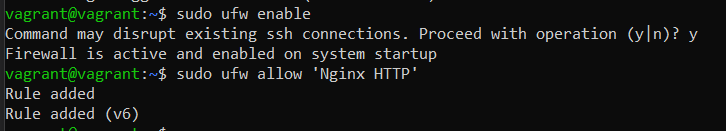

Para probar que esta funcionando el servidor web, se puede pegar la ip designada para este servidor en el buscador, la cual es: 127.0.0.1:8080, y ver que nos aparece un HTML que nos indica que el servidor web nginx esta funcionando. 

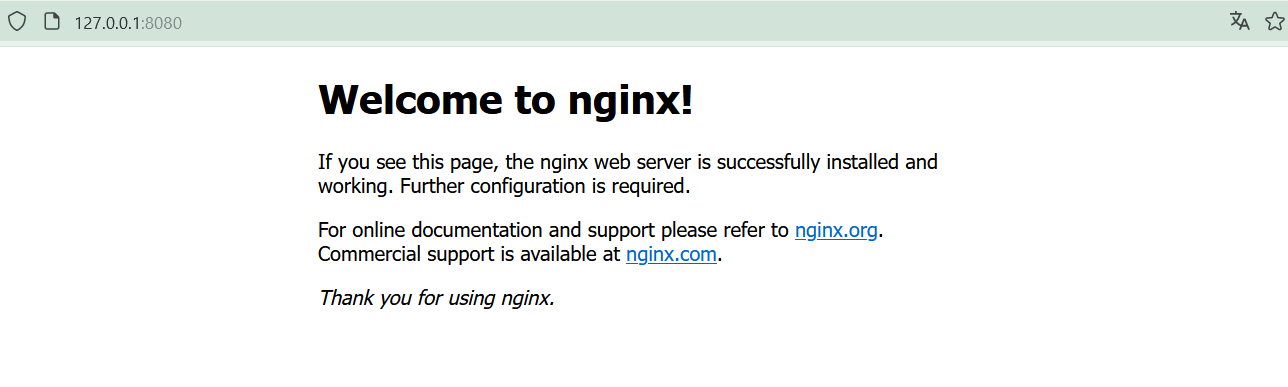

Y tambien se puede verificar el estado del servidor con el siguiente comando:

In [ ]:
sudo systemctl status nginx

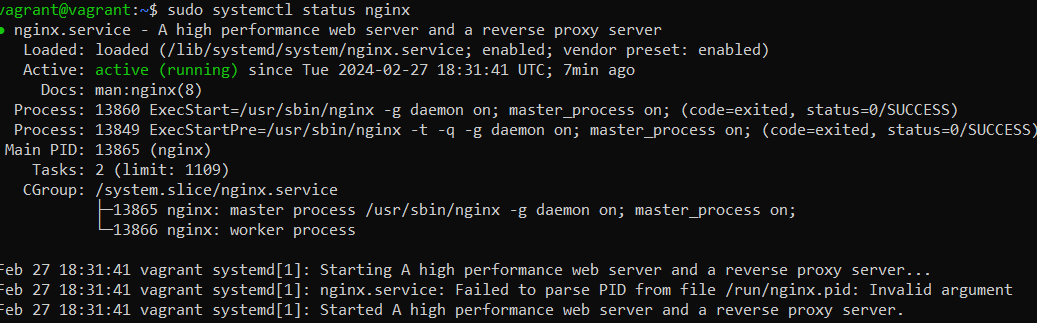

### Vagrant Cliente

A continuacion, de igual manera como se inicializo el servidor se procede a inicializar la VM que contendra al cliente, por lo tanto, se hace uso del siguiente comando:

In [ ]:
vagrant init hashicorp/bionic64

Para la configuracion del vagrant file, proveniente de esta inicializacion se procedio hacer lo siguiente:

Esta configuracion permite configurar las opciones especificas del VirtualBox

In [ ]:
#
   config.vm.provider "virtualbox" do |vb|
  #   # Display the VirtualBox GUI when booting the machine
     vb.gui = true
  #
     # Customize the amount of memory on the VM:
     vb.memory = "1024"
   end
  #

A continuacion, esta sección del Vagrantfile configura la máquina virtual para que, después de que se inicie, se actualice la lista de paquetes, se instale LuaJIT y wrk, y se configure wrk para que se pueda ejecutar desde cualquier lugar.

 config.vm.provision "shell", inline: <<-SHELL
     sudo apt-get update
     sudo git clone https://luajit.org/git/luajit.git
     sudo cd luajit
     sudo make && sudo make install
     sudo apt-get install build-essential libssl-dev git -y 
     sudo git clone https://github.com/wg/wrk.git wrk 
     sudo cd wrk 
     sudo make 
     sudo cp wrk /usr/local/bin 
   SHELL

Una vez con el vagrantfile configurado se procedio a levantar la maquina virtual con el cliente, haciendo uso del siguiente comando:


In [ ]:
vagrant up

Luego, iniciamos una sesion de SSH para conectarnos con la maquina virtual y gestionarla desde la linea de comandos

In [ ]:
vagrant ssh